In [20]:
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from utils import eval_dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
target = 'target'
data = df

In [22]:
ctgan = CTGANSynthesizer(epochs=1)
ctgan.fit(data)

Init CTGAN with differential privacy.  Target epsilon: 4
Epoch 1, Loss G:  0.0394, Loss D: -0.0222, Epsilon: 1.1379
Epoch 2, Loss G:  0.0736, Loss D: -0.0674, Epsilon: 1.6057
Epoch 3, Loss G:  0.1027, Loss D: -0.0959, Epsilon: 1.9682
Epoch 4, Loss G:  0.1111, Loss D: -0.1492, Epsilon: 2.2780
Epoch 5, Loss G:  0.1221, Loss D: -0.2132, Epsilon: 2.5529
Epoch 6, Loss G:  0.1260, Loss D: -0.2643, Epsilon: 2.8073
Epoch 7, Loss G:  0.1215, Loss D: -0.2975, Epsilon: 3.0354
Epoch 8, Loss G:  0.1257, Loss D: -0.3895, Epsilon: 3.2574
Epoch 9, Loss G:  0.1145, Loss D: -0.3635, Epsilon: 3.4590
Epoch 10, Loss G:  0.0555, Loss D: -0.4564, Epsilon: 3.6605
Epoch 11, Loss G: -0.0459, Loss D: -0.5153, Epsilon: 3.8481
Epoch 12, Loss G: -0.1059, Loss D: -0.5733, Epsilon: 4.0235


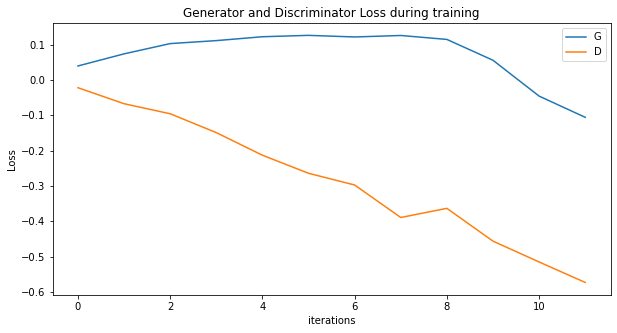

In [23]:
dpctgan = DPCTGANSynthesizer(verbose=True,
                            epochs=1,
                            clip_coeff=0.1,
                            sigma=4,
                            target_epsilon=4,
                            target_delta=1e-5
                            )
dpctgan.fit(data)
dpctgan.plot_losses()


In [24]:
 # evaluate performance using real data
X = data.drop([target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('\nTrain on real, test on real')
real, trtr = eval_dataset(X_train, y_train, X_test, y_test) # history of values and tuple with mean


Train on real, test on real
Average: acc 0.9605	 f1 score 0.9686	 auroc 0.9832	 auprc 0.9856


In [27]:
# evaluate performance using fake data
# CTGAN
samples = ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)
X_syn = samples.drop([target], axis=1)
y_syn = samples[target]
print('\nCTGAN: Train on fake, test on real')
fake_ctgan, tstr_ctgan = eval_dataset(X_syn, y_syn, X_test, y_test)


CTGAN: Train on fake, test on real
Average: acc 0.5322	 f1 score 0.5321	 auroc 0.6614	 auprc 0.7669


In [28]:
# DPCTGAN
samples = dpctgan.sample(len(data))  # Synthetic copy
X_syn = samples.drop([target], axis=1)
y_syn = samples[target]
print('\nDPCTGAN: Train on fake, test on real')
fake_dpctgan, tstr_dpctgan = eval_dataset(X_syn, y_syn, X_test, y_test)


DPCTGAN: Train on fake, test on real
Average: acc 0.3246	 f1 score 0.2823	 auroc 0.228	 auprc 0.5154


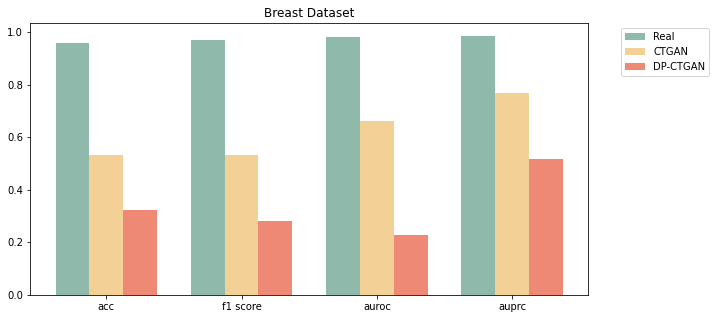

In [29]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['acc', 'f1 score', 'auroc', 'auprc']
plt.figure(figsize=(10, 5))
X = np.arange(4)
plt.title("Breast Dataset")
plt.bar(X + 0.00, trtr, width=0.25, color='#8FB9AA')
plt.bar(X + 0.25, tstr_ctgan, width=0.25, color='#F2D096')
plt.bar(X + 0.50, tstr_dpctgan, width=0.25, color='#ED8975')
plt.xticks(X + 0.25, metrics)
plt.legend(['Real', 'CTGAN', 'DP-CTGAN'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()